**AMES HOUSING PRICE PREDICTION PROJECT**

In [33]:
# Import all the required dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

STEP : EXPLORE THE AMES HOUSING DATA

In [13]:
# Load the AMESHousing.csv file into a DataFrame
ames_housing = pd.read_csv("AmesHousing.csv", na_values="?")

In [14]:
# Display the ames_housing DataFrame info
print(ames_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [15]:
# Segregating the target variable from the features
target_name = "SalePrice"
features, target = ames_housing.drop(columns=target_name), ames_housing[target_name]

In [18]:
# Segregating the numerical features only
numerical_features = features.select_dtypes(include=['float64', 'int64'])
numerical_features.info()
print("................................................................................ \n")
print("The total number of numerical features are: ", len(numerical_features.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

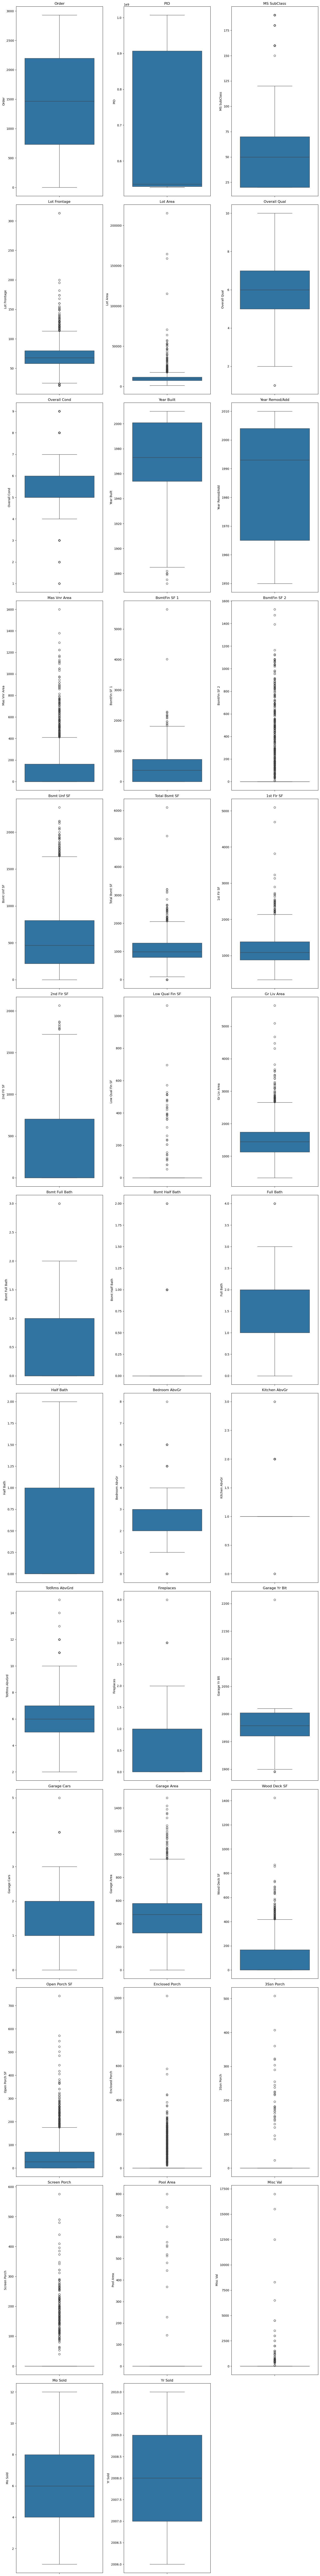

In [31]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 120))
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, ax in enumerate(axes):
    if i < len(numerical_features.columns):
        sns.boxplot(y=numerical_features.iloc[:, i], ax=ax)
        ax.set_title(numerical_features.columns[i])
    else:
        ax.axis('off')  # Hide any extra subplots
        
# Adjust the layout
plt.tight_layout()
plt.show()

- There are hints of outliers from above numerical features visualization

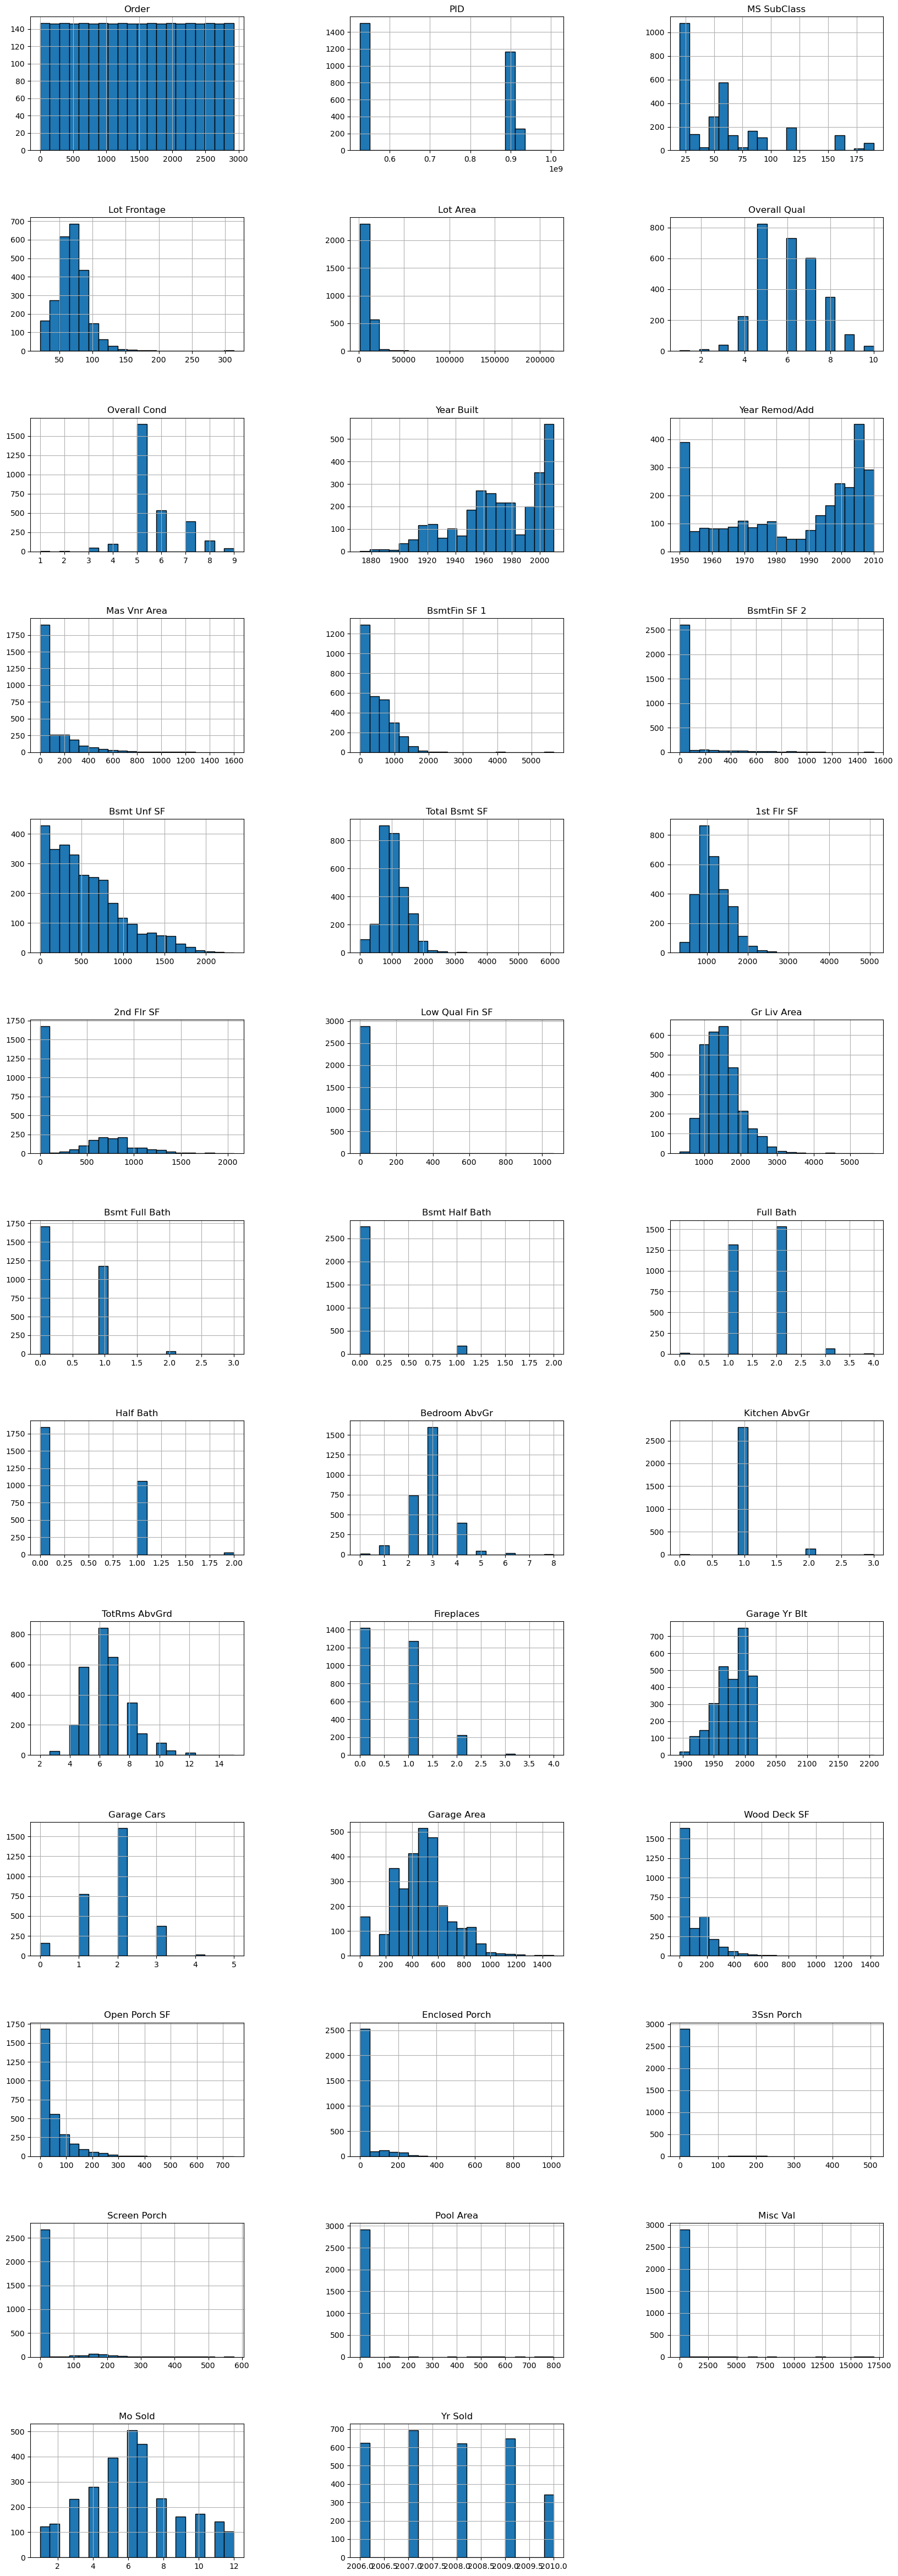

In [43]:
# Plotting the histogram of the numerical features
numerical_features.hist(
    bins=20, figsize=(20, 60), edgecolor='black', layout=(13,3), grid=True
)
plt.subplots_adjust(hspace=0.5, wspace = 0.5)

In [35]:
# Segregating the categorical features only
categorical_features = features.select_dtypes(include=['object'])
categorical_features.info()
print("................................................................................ \n")
print("The total number of categorical features are: ", len(categorical_features.columns))  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Alley           198 non-null    object
 3   Lot Shape       2930 non-null   object
 4   Land Contour    2930 non-null   object
 5   Utilities       2930 non-null   object
 6   Lot Config      2930 non-null   object
 7   Land Slope      2930 non-null   object
 8   Neighborhood    2930 non-null   object
 9   Condition 1     2930 non-null   object
 10  Condition 2     2930 non-null   object
 11  Bldg Type       2930 non-null   object
 12  House Style     2930 non-null   object
 13  Roof Style      2930 non-null   object
 14  Roof Matl       2930 non-null   object
 15  Exterior 1st    2930 non-null   object
 16  Exterior 2nd    2930 non-null   object
 17  Mas Vnr Type    1155 non-null   object
 18  Exter Qu

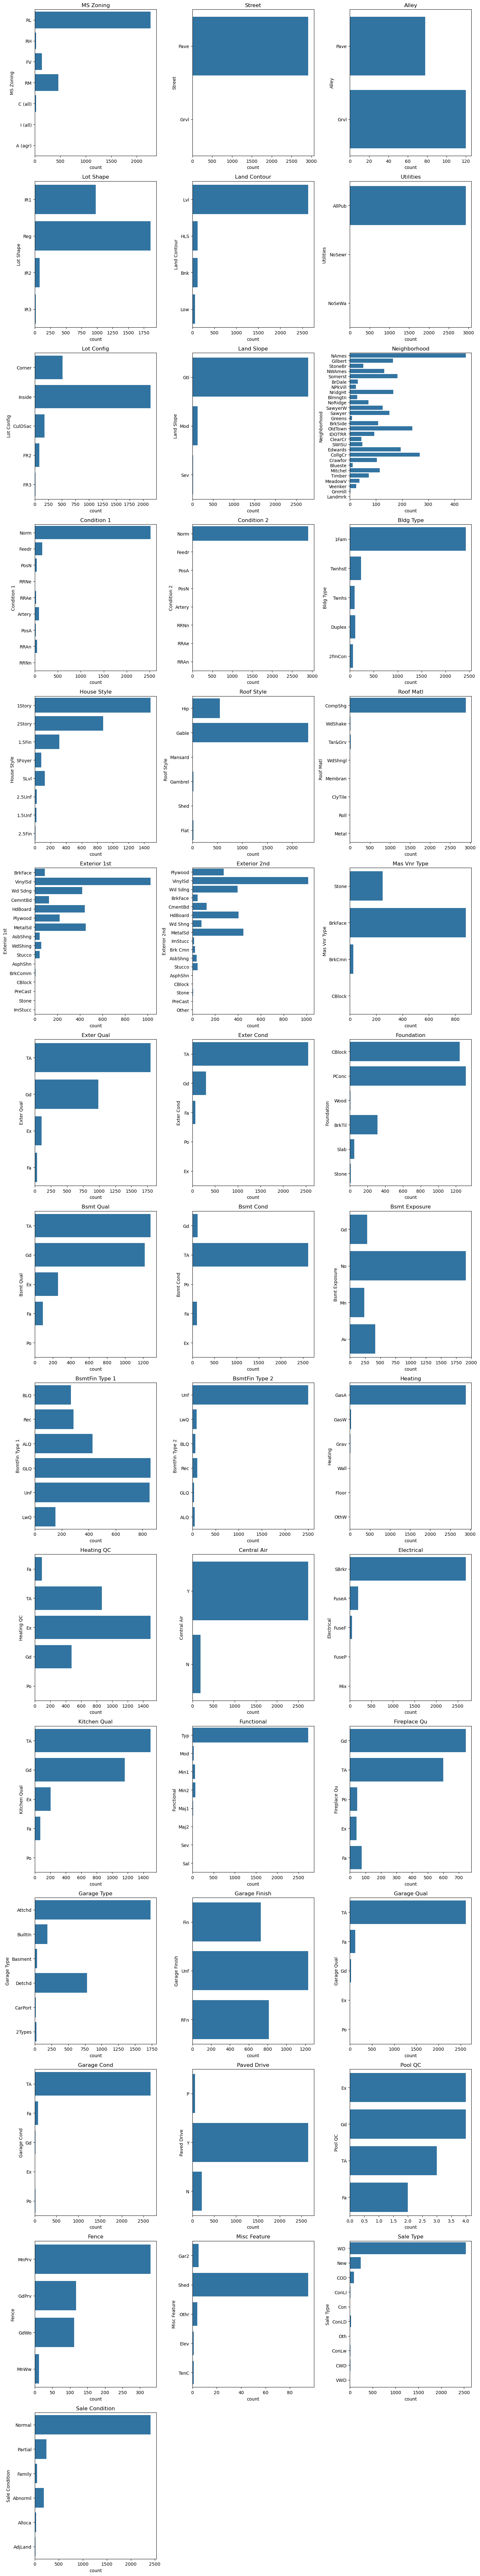

In [36]:
# Plotting bar plots for each categorical feature
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(15, 80))
axes = axes.flatten()

# Plot each categorical feature in a separate subplot
for i, ax in enumerate(axes):
    if i < len(categorical_features.columns):
        sns.countplot(y=categorical_features.iloc[:, i], ax=ax)
        ax.set_title(categorical_features.columns[i])
    else:
        ax.axis('off')  # Hide any extra subplots

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
# Display the correlation matrix of the numerical features
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Plotting histograms for categorical features on a matrix
fig, axes = plt.subplots(len(categorical_features) // 3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.histplot(data=categorical_features, x=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()